<a href="https://colab.research.google.com/github/omarbrandan/DS2/blob/main/Proyecto_DS2_Brandan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

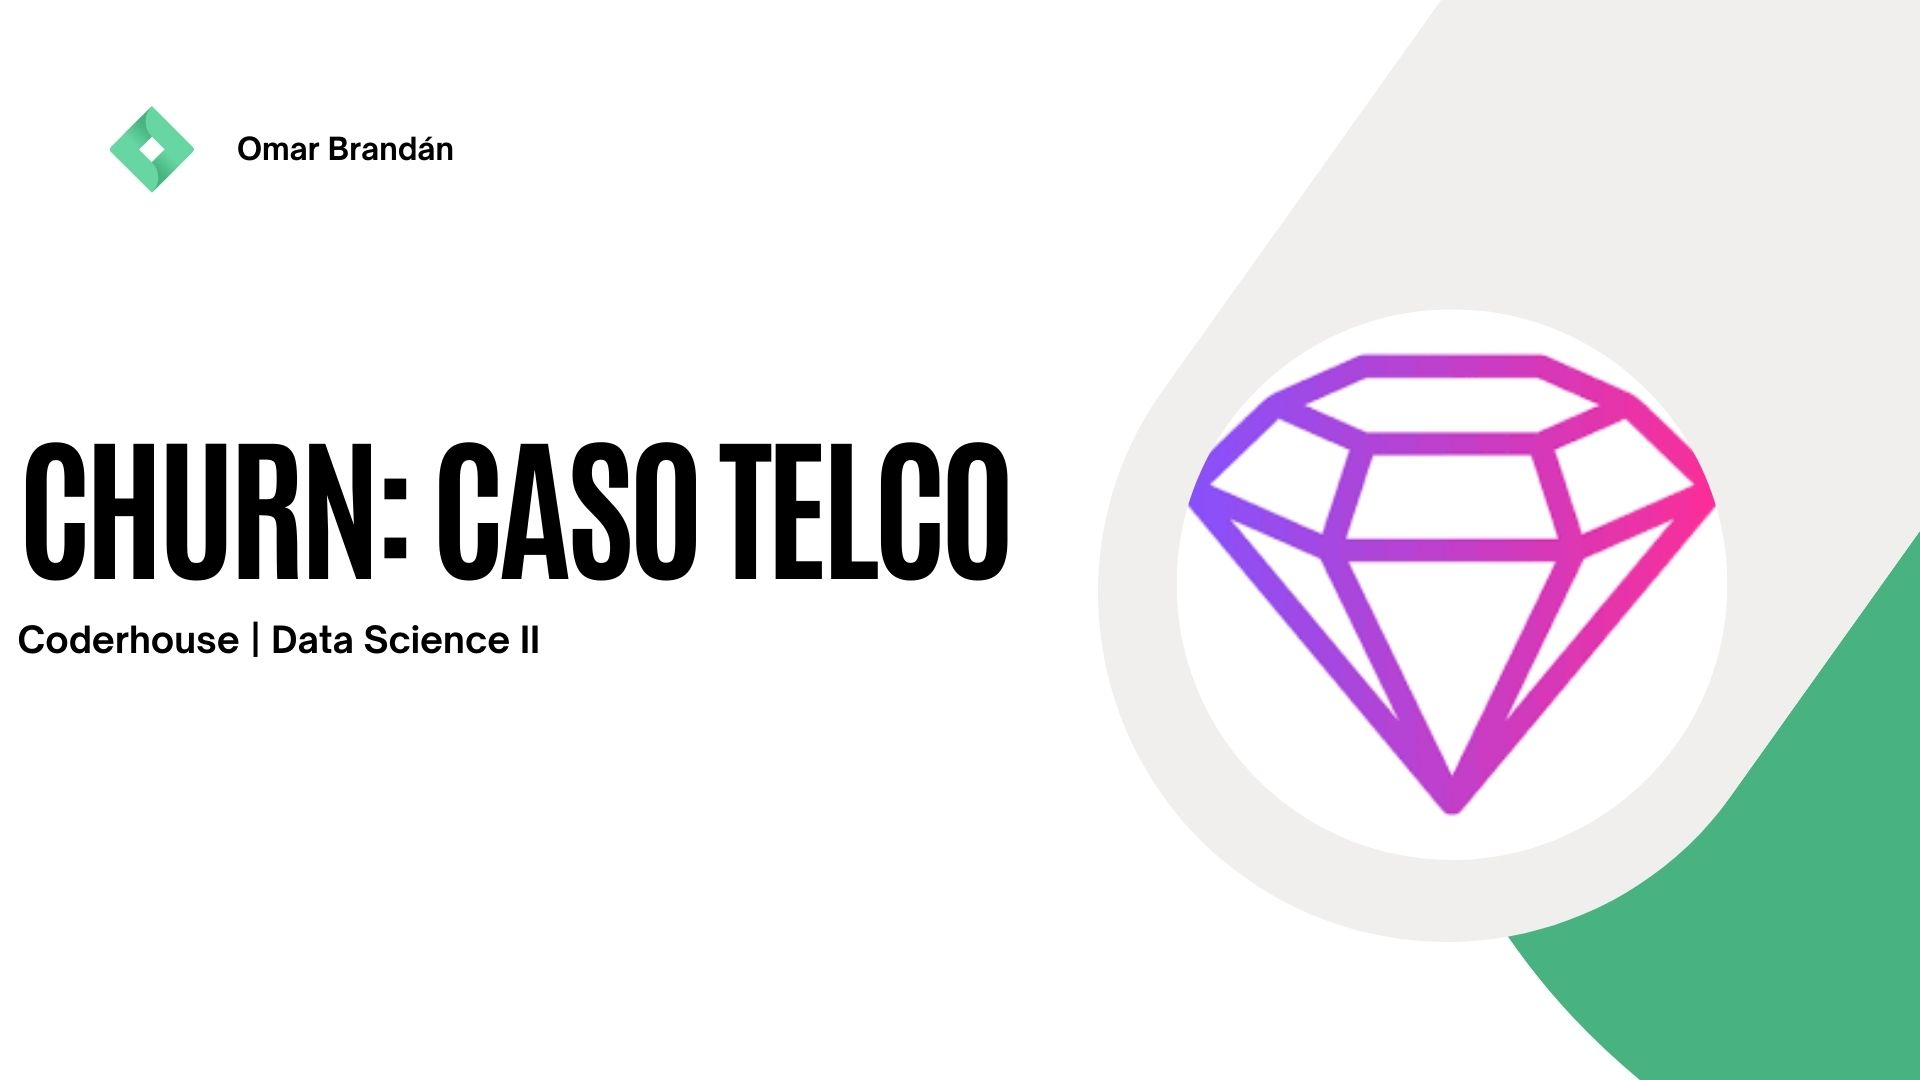

La creciente presión competitiva requiere que la compañía desarrolle nuevas e innovadoras formas de satisfacer las mayores demandas que los clientes realizan. Desarrollar esas nuevas ideas requiere información acerca de sus clientes, la que debe ser inferida a partir de los datos recopilados sobre dichos clientes.
La predicción de churn resulta ser la mayor preocupación en una compañía del sector de las telecomunicaciones, como consecuencia de las características típicas de este mercado, tales como saturación y cambios dinámicos. A medida que el mercado se satura, la adquisición de nuevos clientes resulta más costosa que retener los clientes existentes. Por otra parte, los cambios dinámicos del mercado en lo que se refiere a competidores, tecnología y regulaciones generan mayores oportunidades para que los clientes cambien de proveedor.
La compañía desea saber si las técnicas de Data Mining pueden proporcionar alguna respuesta al problema de predecir cuáles son los clientes que posiblemente abandonen el servicio voluntariamente y que debería intentar conservar, por tratarse de clientes de valor para la compañía. La información de qué clientes abandonarán el servicio, la compañía necesita conocerla al menos con dos meses de anticipación, para poder iniciar una campaña de retención. Para esto se requiere una buena comprensión del comportamiento de los clientes, de manera de poder identificar a aquellos que están por dejar la compañía y al mismo tiempo, quienes son redituables.

Público objetivo: Área de Marketing de la empresa Telco.

# **LECTURA DE DATOS**

## Librerías

In [118]:
pip install plotly

In [119]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

## Lectura de dataset

In [120]:
telco = pd.read_csv('https://raw.githubusercontent.com/omarbrandan/DS2/refs/heads/main/telco.csv', sep=';')

## Descripción de variables originales

State: Estado o región en la que reside el cliente.

Account_Length: Duración de la cuenta en días o meses. Clientes con cuentas más largas pueden ser menos propensos a dejar el servicio, aunque también podría haber un desgaste natural.

Area_Code: Código de área del número telefónico del cliente. Similar a "State", puede proporcionar información geográfica.

Phone: Número de teléfono del cliente. No suele ser una variable útil para un modelo de churn, pero se incluye para identificar al cliente.

Intl_Plan: Indica si el cliente tiene un plan de llamadas internacionales (sí/no). Puede ser relevante, ya que los clientes que usan este servicio podrían tener diferentes niveles de lealtad.

Vmail_Plan: Indica si el cliente tiene un plan de buzón de voz (sí/no). Similar al plan internacional, puede dar pistas sobre los servicios contratados.

Vmail_Message: Número de mensajes de voz que el cliente ha recibido. Este dato podría estar relacionado con el uso y necesidad de ciertos servicios.

Day_Mins: Minutos utilizados durante el día. Indica el uso del servicio, lo que puede correlacionarse con la satisfacción del cliente.

Day_Calls: Número de llamadas realizadas durante el día. Similar a "Day_Mins", mide el uso del servicio.

Day_Charge: Costo de las llamadas diurnas. Puede ser útil para entender si el cliente está pagando mucho por su servicio y, por lo tanto, está insatisfecho.

Eve_Mins: Minutos utilizados en la tarde/noche. Similar a "Day_Mins", pero refleja un patrón de uso diferente.

Eve_Calls: Número de llamadas realizadas en la tarde/noche.

Eve_Charge: Costo de las llamadas en la tarde/noche.

Night_Mins: Minutos utilizados en la noche. Estos minutos suelen tener un costo más bajo o ser gratuitos en algunos planes, por lo que puede ser una indicación del uso en horas no pico.

Night_Calls: Número de llamadas realizadas en la noche.

Night_Charge: Costo de las llamadas en la noche.

Intl_Mins: Minutos utilizados en llamadas internacionales. Este dato puede ser importante si el cliente tiene un plan internacional y lo usa con frecuencia.

Intl_Calls: Número de llamadas internacionales realizadas.

Intl_Charge: Costo de las llamadas internacionales. Puede indicar si el cliente está satisfecho o no con las tarifas internacionales.

CustServ_Calls: Número de veces que el cliente ha llamado al servicio de atención al cliente. Este es uno de los predictores más comunes del churn; muchas llamadas pueden indicar problemas o insatisfacción.

Churn: Variable objetivo (target), que indica si el cliente ha abandonado el servicio o no (sí/no). Es lo que se busca predecir con el modelo.

# EDA I

## Análisis inicial

In [121]:
telco.sample(5)

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
2745,PA,61,408,343-1347,no,yes,40,105,78,"17,85",...,100,"15,35","174,1",115,"7,83","10,2",2,"2,75",2,True.
2939,AL,72,415,341-7296,no,no,0,"166,5",102,"28,31",...,103,"22,19","262,7",85,"11,82","13,3",5,"3,59",0,False.
1729,MS,111,415,404-9978,no,yes,36,"96,8",123,"16,46",...,105,"14,5",166,85,"7,47","13,4",4,"3,62",2,False.
2475,AK,1,408,373-1028,no,no,0,"175,2",74,"29,78",...,79,"12,89","230,5",109,"10,37","5,3",3,"1,43",1,False.
993,TN,70,510,395-4757,no,no,0,"126,3",99,"21,47",...,106,"12,04","255,9",96,"11,52","9,6",2,"2,59",0,False.


In [122]:
telco.shape

(3099, 21)

In [123]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           3099 non-null   object
 1   Account_Length  3099 non-null   int64 
 2   Area_Code       3099 non-null   int64 
 3   Phone           3099 non-null   object
 4   Intl_Plan       3099 non-null   object
 5   Vmail_Plan      3099 non-null   object
 6   Vmail_Message   3099 non-null   int64 
 7   Day_Mins        3099 non-null   object
 8   Day_Calls       3099 non-null   int64 
 9   Day_Charge      3099 non-null   object
 10  Eve_Mins        3099 non-null   object
 11  Eve_Calls       3099 non-null   int64 
 12  Eve_Charge      3099 non-null   object
 13  Night_Mins      3099 non-null   object
 14  Night_Calls     3099 non-null   int64 
 15  Night_Charge    3099 non-null   object
 16  Intl_Mins       3099 non-null   object
 17  Intl_Calls      3099 non-null   int64 
 18  Intl_Cha

In [124]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,3099.0,101.183930,39.852970,1.0,74.0,101.0,127.0,243.0
Area_Code,3099.0,437.191029,42.365585,408.0,411.5,415.0,510.0,510.0
Vmail_Message,3099.0,8.074540,13.668535,0.0,0.0,0.0,19.5,51.0
Day_Calls,3099.0,100.366570,20.081223,0.0,87.0,101.0,114.0,165.0
Eve_Calls,3099.0,100.013875,19.860313,0.0,87.0,100.0,113.5,168.0
Night_Calls,3099.0,99.971281,19.508605,33.0,87.0,100.0,113.0,175.0
Intl_Calls,3099.0,4.462407,2.441330,0.0,3.0,4.0,6.0,19.0
CustServ_Calls,3099.0,1.555340,1.312804,0.0,1.0,1.0,2.0,9.0


In [125]:
telco.describe(include=['object'])

,State,Phone,Intl_Plan,Vmail_Plan,Day_Mins,Day_Charge,Eve_Mins,Eve_Charge,Night_Mins,Night_Charge,Intl_Mins,Intl_Charge,Churn
count,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099,3099
unique,51,3099,2,2,1620,1620,1563,1400,1541,915,160,160,2
top,WV,382-4657,no,no,"174,5","29,67","169,9","14,25",210,"9,45",10,"2,7",False.
freq,96,1,2800,2244,8,8,9,10,8,14,56,56,2652


In [126]:
telco.duplicated().sum()

0

In [127]:
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

In [128]:
# Diccionario de abreviaturas de estados a nombres completos
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

# Crear una nueva columna en el dataframe con los nombres completos de los estados
telco['State_Name'] = telco['State'].map(state_names)

In [129]:
# Transformar Churn en 0 y 1
telco['Churn'] = telco['Churn'].replace({'False.': 0, 'True.': 1}).astype(int)

# Agrupar por estado y contar la cantidad de churn
churn_by_state = telco.groupby('State_Name')['Churn'].sum().reset_index()
churn_by_state.columns = ['State_Name', 'Churn_Count']

<ipython-input-129-a725eef001af>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [130]:
# Diccionario con coordenadas de latitud y longitud aproximadas del centro de cada estado
state_coords = {
    'Alabama': [32.806671, -86.791130], 'Alaska': [61.370716, -152.404419], 'Arizona': [33.729759, -111.431221],
    'Arkansas': [34.969704, -92.373123], 'California': [36.116203, -119.681564], 'Colorado': [39.059811, -105.311104],
    'Connecticut': [41.597782, -72.755371], 'Delaware': [39.318523, -75.507141], 'Florida': [27.766279, -81.686783],
    'Georgia': [33.040619, -83.643074], 'Hawaii': [21.094318, -157.498337], 'Idaho': [44.240459, -114.478828],
    'Illinois': [40.349457, -88.986137], 'Indiana': [39.849426, -86.258278], 'Iowa': [42.011539, -93.210526],
    'Kansas': [38.526600, -96.726486], 'Kentucky': [37.668140, -84.670067], 'Louisiana': [31.169546, -91.867805],
    'Maine': [44.693947, -69.381927], 'Maryland': [39.063946, -76.802101], 'Massachusetts': [42.230171, -71.530106],
    'Michigan': [43.326618, -84.536095], 'Minnesota': [45.694454, -93.900192], 'Mississippi': [32.741646, -89.678696],
    'Missouri': [38.456085, -92.288368], 'Montana': [46.921925, -110.454353], 'Nebraska': [41.125370, -98.268082],
    'Nevada': [38.313515, -117.055374], 'New Hampshire': [43.452492, -71.563896], 'New Jersey': [40.298904, -74.521011],
    'New Mexico': [34.840515, -106.248482], 'New York': [42.165726, -74.948051], 'North Carolina': [35.630066, -79.806419],
    'North Dakota': [47.528912, -99.784012], 'Ohio': [40.388783, -82.764915], 'Oklahoma': [35.565342, -96.928917],
    'Oregon': [44.572021, -122.070938], 'Pennsylvania': [40.590752, -77.209755], 'Rhode Island': [41.680893, -71.511780],
    'South Carolina': [33.856892, -80.945007], 'South Dakota': [44.299782, -99.438828], 'Tennessee': [35.747845, -86.692345],
    'Texas': [31.054487, -97.563461], 'Utah': [40.150032, -111.862434], 'Vermont': [44.045876, -72.710686],
    'Virginia': [37.769337, -78.169968], 'Washington': [47.400902, -121.490494], 'West Virginia': [38.491226, -80.954456],
    'Wisconsin': [44.268543, -89.616508], 'Wyoming': [42.755966, -107.302490], 'District of Columbia': [38.897957, -77.036560]
}

In [131]:
# Crear el mapa de calor
fig = px.choropleth_mapbox(
    churn_by_state,
    geojson=geojson_url,
    locations='State_Name',
    featureidkey='properties.name',
    color='Churn_Count',
    color_continuous_scale='YlOrRd',
    mapbox_style='carto-positron',
    zoom=3,
    center={'lat': 37.0902, 'lon': -95.7129},
    opacity=0.6,
    title='Mapa de Calor de Churn por Estado'
)

# Añadir anotaciones de texto para cada estado
for state, coords in state_coords.items():
    fig.add_scattermapbox(
        lat=[coords[0]],
        lon=[coords[1]],
        mode='text',
        text=[state],
        textfont=dict(size=10, color='black'),
        showlegend=False
    )

# Mostrar el mapa con nombres de los estados
fig.show(config={'scrollZoom': True})

# PREPROCESAMIENTO DE DATOS

## Transformación de variables

Se transformó a Churn, Plan internacional y Plan de buzón de voz en variables binarias 0 y 1 con One-Hot Enconding.

Se agruparon los estados en 4 regiones: North, South, East, West.

Se transformaron variables que son cuantativas, pero que estaban como categóricas, en numéricas.

Se definió al número de celular como índice, al ser un valor único que representa cada individuo.



In [132]:
#One-Hot Encoding
telco['Intl_Plan'] = telco['Intl_Plan'].map({'no': 0, 'yes': 1})
telco['Vmail_Plan'] = telco['Vmail_Plan'].map({'no': 0, 'yes': 1})

#Agrupar estados en 4 regiones
region_mapping = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'East', 'DC': 'East', 'DE': 'East', 'FL': 'South',
    'GA': 'South', 'HI': 'West', 'IA': 'North', 'ID': 'West', 'IL': 'North',
    'IN': 'North', 'KS': 'North', 'KY': 'South', 'LA': 'South', 'MA': 'East',
    'MD': 'East', 'ME': 'North', 'MI': 'North', 'MN': 'North', 'MO': 'North',
    'MS': 'South', 'MT': 'West', 'NC': 'South', 'ND': 'North', 'NE': 'North',
    'NH': 'East', 'NJ': 'East', 'NM': 'West', 'NV': 'West', 'NY': 'East',
    'OH': 'North', 'OK': 'South', 'OR': 'West', 'PA': 'East', 'RI': 'East',
    'SC': 'South', 'SD': 'North', 'TN': 'South', 'TX': 'South', 'UT': 'West',
    'VA': 'East', 'VT': 'North', 'WA': 'West', 'WI': 'North', 'WV': 'South',
    'WY': 'West'
}

telco['Region'] = telco['State'].map(region_mapping)
telco = telco.drop(columns=['State'])
telco = pd.get_dummies(telco, columns=['Region'], drop_first=True)
telco = telco.astype({'Region_South': int, 'Region_North': int, 'Region_West': int})

#Transformación de variables numéricas
telco['Day_Mins'] = telco['Day_Mins'].str.replace(',', '.').astype(float)
telco['Day_Charge'] = telco['Day_Charge'].str.replace(',', '.').astype(float)
telco['Eve_Mins'] = telco['Eve_Mins'].str.replace(',', '.').astype(float)
telco['Eve_Charge'] = telco['Eve_Charge'].str.replace(',', '.').astype(float)
telco['Night_Mins'] = telco['Night_Mins'].str.replace(',', '.').astype(float)
telco['Night_Charge'] = telco['Night_Charge'].str.replace(',', '.').astype(float)
telco['Intl_Mins'] = telco['Intl_Mins'].str.replace(',', '.').astype(float)
telco['Intl_Charge'] = telco['Intl_Charge'].str.replace(',', '.').astype(float)
telco['Phone'] = telco['Phone'].str.replace('-', '').astype(int)
telco = telco.set_index('Phone')

## Ingeniería de características

Se agruparon los minutos y costos; y se crearon los ratios de frecuencia de mensajes de voz y llamadas por día.

In [133]:
telco['Total_Mins'] = telco['Day_Mins'] + telco['Eve_Mins'] + telco['Night_Mins'] + telco['Intl_Mins']
telco['Total_Charge'] = telco['Day_Charge'] + telco['Eve_Charge'] + telco['Night_Charge'] + telco['Intl_Charge']
telco['Vmail_Frequency'] = telco['Vmail_Message'] / telco['Account_Length']
telco['Calls_Per_Day'] = (telco['Day_Calls'] + telco['Eve_Calls'] + telco['Night_Calls'] + telco['Intl_Calls']) / telco['Account_Length']

# EDA II

Análisis Inicial II

In [134]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3099 entries, 3824657 to 3712155
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   3099 non-null   int64  
 1   Area_Code        3099 non-null   int64  
 2   Intl_Plan        3099 non-null   int64  
 3   Vmail_Plan       3099 non-null   int64  
 4   Vmail_Message    3099 non-null   int64  
 5   Day_Mins         3099 non-null   float64
 6   Day_Calls        3099 non-null   int64  
 7   Day_Charge       3099 non-null   float64
 8   Eve_Mins         3099 non-null   float64
 9   Eve_Calls        3099 non-null   int64  
 10  Eve_Charge       3099 non-null   float64
 11  Night_Mins       3099 non-null   float64
 12  Night_Calls      3099 non-null   int64  
 13  Night_Charge     3099 non-null   float64
 14  Intl_Mins        3099 non-null   float64
 15  Intl_Calls       3099 non-null   int64  
 16  Intl_Charge      3099 non-null   float64
 17  CustServ_C

In [135]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Account_Length,3099.0,101.183930,39.852970,1.000000,74.000000,101.000000,127.000000,243.00
Area_Code,3099.0,437.191029,42.365585,408.000000,411.500000,415.000000,510.000000,510.00
Intl_Plan,3099.0,0.096483,0.295300,0.000000,0.000000,0.000000,0.000000,1.00
Vmail_Plan,3099.0,0.275895,0.447037,0.000000,0.000000,0.000000,1.000000,1.00
Vmail_Message,3099.0,8.074540,13.668535,0.000000,0.000000,0.000000,19.500000,51.00
Day_Mins,3099.0,179.596999,54.632572,0.000000,143.900000,179.300000,216.000000,350.80
Day_Calls,3099.0,100.366570,20.081223,0.000000,87.000000,101.000000,114.000000,165.00
Day_Charge,3099.0,30.532043,9.287510,0.000000,24.460000,30.480000,36.720000,59.64
Eve_Mins,3099.0,201.024266,50.900248,0.000000,166.600000,201.300000,235.800000,363.70
Eve_Calls,3099.0,100.013875,19.860313,0.000000,87.000000,100.000000,113.500000,168.00


In [136]:
telco['Churn'].value_counts().reset_index()

,Churn,count
0,0,2652
1,1,447


## Distribuciones

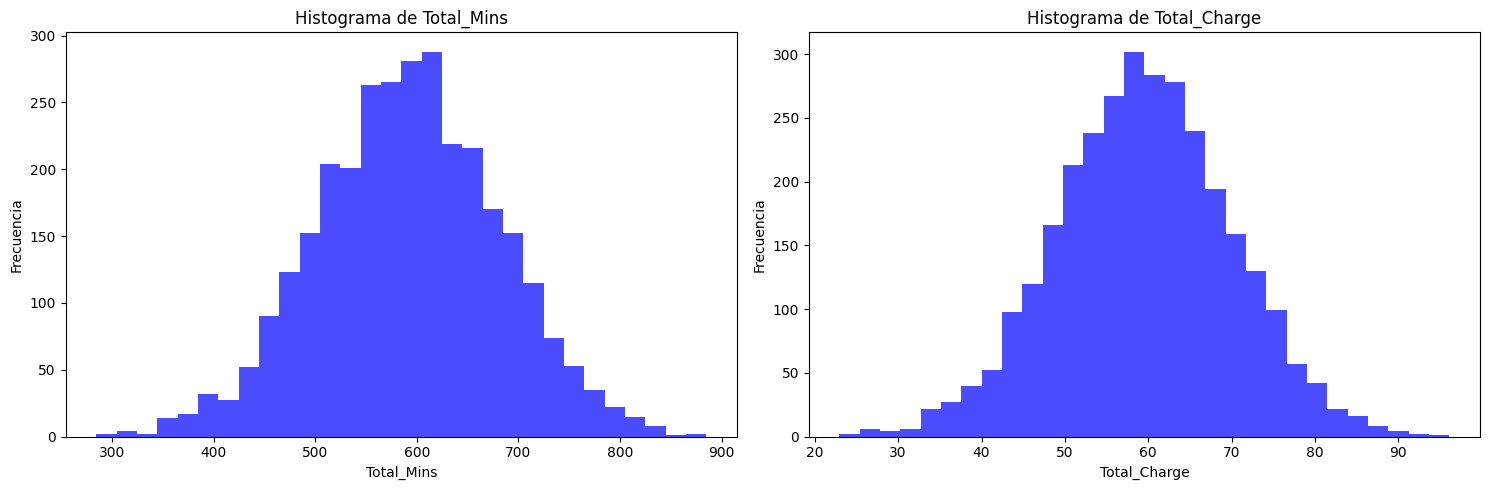

In [137]:
num_columns = ['Total_Mins', 'Total_Charge']

# Configurar el número de subgráficas
n_col = len(num_columns)
n_rows = (n_col // 3) + (n_col % 3 > 0)  # 3 columnas por fila

# Crear una figura y ejes
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))

# Aplanar los ejes para facilitar la iteración
axs = axs.flatten()

# Graficar un histograma para cada columna numérica
for i, column in enumerate(num_columns):
    axs[i].hist(telco[column], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Histograma de {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frecuencia')

# Ajustar la distribución de la gráfica
plt.tight_layout()
plt.show()

Se puede observar una distribución normal en el total de minutos y costo.

## Outliers

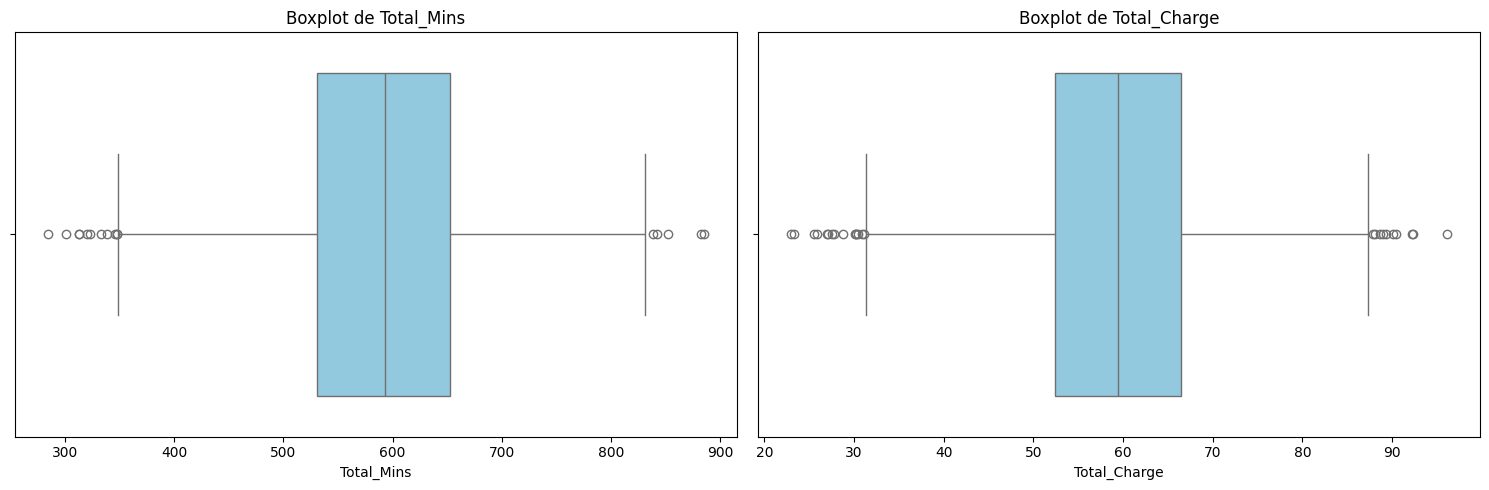

In [138]:
# Configurar el número de subgráficas
n_col = len(num_columns)
n_rows = (n_col // 3) + (n_col % 3 > 0)  # 3 columnas por fila

# Crear una figura y ejes
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))

# Aplanar los ejes para facilitar la iteración
axs = axs.flatten()

# Graficar un boxplot para cada columna numérica
for i, column in enumerate(num_columns):
    sns.boxplot(ax=axs[i], x=telco[column], color='skyblue')
    axs[i].set_title(f'Boxplot de {column}')
    axs[i].set_xlabel(column)

# Ajustar la distribución de la gráfica
plt.tight_layout()
plt.show()

Si bien hay outliers en las variables presentadas, voy a quedarme con esos datos ya que pueden explicar qué clientes dejaron y dejarán el servicio.

In [139]:
filtered_telco = telco[telco['Calls_Per_Day'] <= 100]
filtered_telco['Churn'] = filtered_telco['Churn'].astype(str)

fig = px.scatter(
    filtered_telco,
    x='Total_Charge',
    y='Calls_Per_Day',
    color='Churn',
    color_discrete_map={0: 'blue', 1: 'red'},
    title='Gráfico de Dispersión: Total Charge vs. Calls Per Day',
    labels={'Churn': 'Churn'}
)

fig.show()

<ipython-input-139-5a9c089f9faf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A partir de 10 llamadas por día, se registran pocos casos de abandono del servicio.

A partir de 40 USD de costo total, se presentan más casos de abandono.

In [140]:
filtered_telco['Churn'] = filtered_telco['Churn'].astype(str)

fig = px.scatter(
    filtered_telco,
    x='Account_Length',
    y='Total_Mins',
    color='Churn',
    color_discrete_map={0: 'blue', 1: 'red'},
    title='Gráfico de Dispersión: Account Length vs. Total Mins',
    labels={'Churn': 'Churn'}
)

fig.show()

<ipython-input-140-e7134097f3e7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Después de los 200 días, hay pocos casos de abandono.

No se encuentra correlación entre el total de minutos y duración de la cuenta en los casos de abandono.

In [141]:
telco['Churn'] = telco['Churn'].astype(str)

fig = px.scatter(
    telco,
    x='Total_Mins',
    y='Total_Charge',
    color='Churn',
    color_discrete_map={0: 'blue', 1: 'red'},
    title='Gráfico de Dispersión: Total Mins vs. Total Charge',
    labels={'Churn': 'Churn'}
)

fig.show()

Cuanto mayor son los minutos utilizados, mayor es el cargo.

Entre 300 y 450 minutos, se observan pocos casos de abandono. Puede deberse a que perciben que el costo no es alto.

#FEATURE SELECTION

In [142]:
# Variables independientes
X = telco[['Intl_Plan', 'Vmail_Plan', 'CustServ_Calls',
           'Region_North', 'Region_South', 'Region_West',
           'Total_Mins', 'Total_Charge', 'Vmail_Frequency', 'Calls_Per_Day']]

# Variable dependiente
y = telco['Churn']

In [143]:
X.sample(3)

,Intl_Plan,Vmail_Plan,CustServ_Calls,Region_North,Region_South,Region_West,Total_Mins,Total_Charge,Vmail_Frequency,Calls_Per_Day
Phone,,,,,,,,,,
3452401,0,0,0,0,0,0,666.1,66.52,0.0,14.000000
3904003,0,0,0,0,0,0,443.6,38.59,0.0,2.607692
3949220,0,0,0,0,0,1,654.1,63.66,0.0,4.378049


In [144]:
y.sample(3)

,Churn
Phone,
3514025,1
3784294,0
4026591,0


# ÁRBOL DE DECISIÓN

Mejores hiperparámetros: {'ccp_alpha': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
 


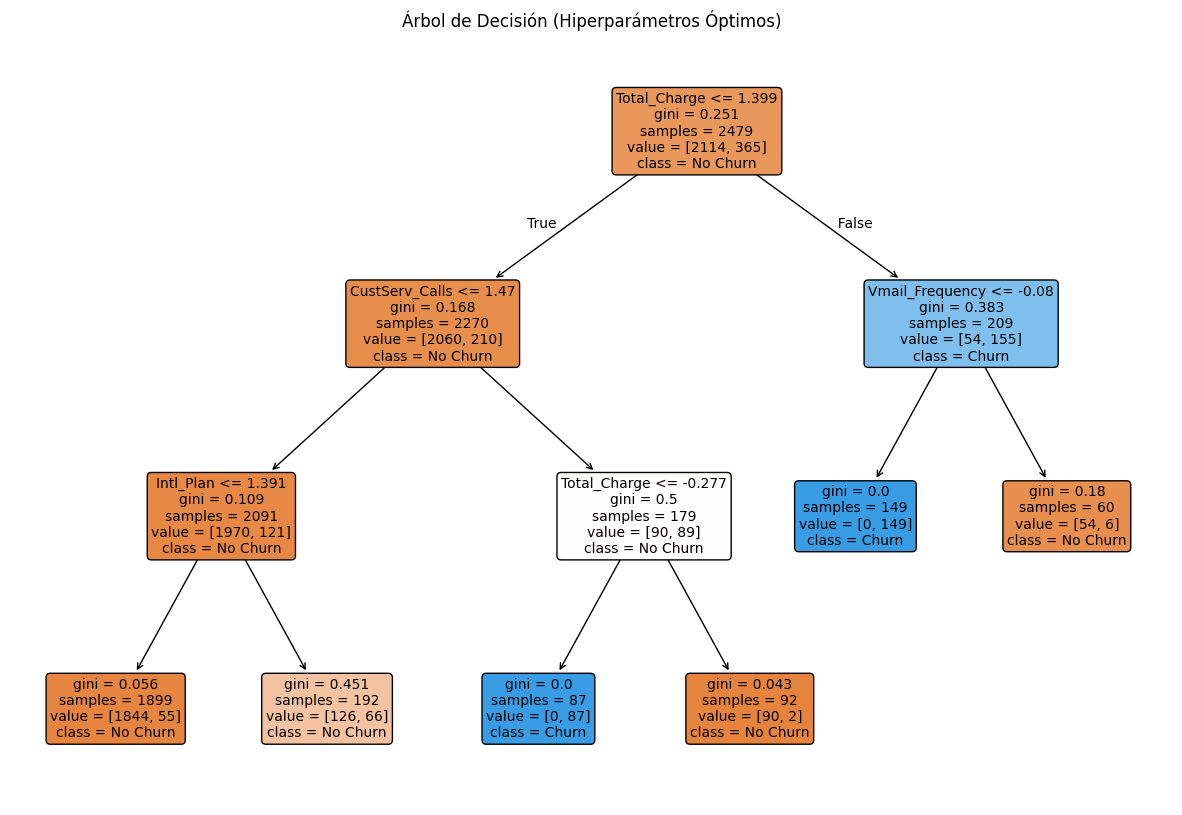

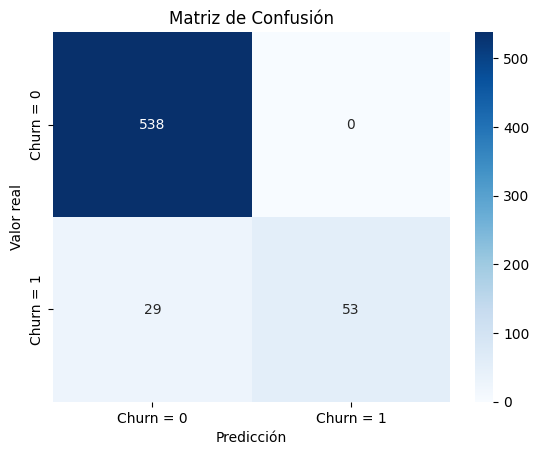


Reporte de Clasificación (Modelo Optimizado):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       538
           1       1.00      0.65      0.79        82

    accuracy                           0.95       620
   macro avg       0.97      0.82      0.88       620
weighted avg       0.96      0.95      0.95       620


Precisión del Modelo Optimizado: 0.9532258064516129


In [145]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de Árbol de Decisión por defecto
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Definir la grilla de hiperparámetros para optimización
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0.01, 0.02, 0.05]
}

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)
print(" ")

# Crear un modelo de Árbol de Decisión usando los mejores hiperparámetros
best_tree = DecisionTreeClassifier(
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    ccp_alpha=grid_search.best_params_['ccp_alpha'],
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
best_tree.fit(X_train, y_train)

# Graficar el árbol de decisión optimizado
plt.figure(figsize=(15, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=["No Churn", "Churn"], rounded=True, fontsize=10)
plt.title('Árbol de Decisión (Hiperparámetros Óptimos)')
plt.show()

# Realizar predicciones con el árbol optimizado
y_pred_opt = best_tree.predict(X_test)

# Evaluar el modelo optimizado
print(" ")
confusion_mtx = confusion_matrix(y_test, y_pred_opt)
g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d')
g.set(title='Matriz de Confusión', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['Churn = 0', 'Churn = 1'])
g.set_yticklabels(['Churn = 0', 'Churn = 1'])
plt.show()

print("\nReporte de Clasificación (Modelo Optimizado):")
print(classification_report(y_test, y_pred_opt))
print("\nPrecisión del Modelo Optimizado:", accuracy_score(y_test, y_pred_opt))

Gini = indica el nivel de impureza antes de la división. Cuanto más bajo sea el índice, mayor será la pureza del nodo.





## Nodo raíz

El primer criterio utilizado para dividir los datos es el valor de Total_Charge, la condición es Total_Charge <= 1.399.

Gini = 0.251.

Hay 2479 muestras en total, de las cuales 2114 corresponden a "No Churn" y 365 a "Churn".



### División izquierda (Total_Charge <= 1.399)

La siguiente condición es CustServ_Calls <= 1.47.

Gini = 0.168 sugiere que la impureza disminuyó, lo que indica que la división logró separar mejor las muestras.

Con 2270 muestras, 2060 son "No Churn" y 210 son "Churn", indicando que la mayoría de los usuarios que tienen un cargo total bajo y pocas llamadas al servicio al cliente no abandonan.**texto en negrita**

#### Rama izquierda de CustServ_Calls <= 1.47

Se examina si Intl_Plan <= 1.391.

Gini = 0.109 indica una mayor pureza.

2091 muestras están presentes, con 1970 "No Churn" y 121 "Churn". Los usuarios sin un plan internacional tienden a quedarse.

##### Subrama izquierda de Intl_Plan <= 1.391

Esta rama representa a los usuarios que no tienen un plan internacional, y aquí se observa una menor impureza con un Gini de 0.056.

De 1899 muestras, solo 55 son "Churn".

### División derecha (Total_Charge > 1.399)

La siguiente condición es Vmail_Frequency <= -0.08.

Gini = 0.383 muestra mayor impureza comparado con otras ramas.

Hay 209 muestras, con 54 "No Churn" y 155 "Churn", lo que indica que la mayoría de los usuarios en esta categoría tienden a abandonar.

## Interpretación

Las características más importantes para predecir el churn parecen ser Total_Charge, CustServ_Calls e Intl_Plan.

Un cargo total bajo, pocas llamadas al servicio al cliente y la falta de un plan internacional están asociados con una menor probabilidad de churn.

Por otro lado, un elevado costo total o frecuencias bajas de correo de voz tienden a aumentar la probabilidad de abandono.